### Simple Softmax Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse

### Get Data

In [2]:
test_percentage = 0.4
debug = 0
from sklearn.preprocessing import OneHotEncoder

#y = 5000x1 matrix, returns a 5000x10 matrix

def one_hot(y):
    encoder = OneHotEncoder(sparse=False)
    return encoder.fit_transform(y)


In [3]:
from sklearn.cross_validation import train_test_split
from scipy.io import loadmat


data = loadmat('data/ex3data1.mat')
X = data['X']
y = data['y']

print("X.shape,y.shape:",X.shape,y.shape)
#(Xtrain, ytrain,Xtest,ytest) = split_and_shuffle_data_set(0.7,X,y)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=test_percentage,random_state=42)
ytrain_onehot = one_hot(ytrain)
ytest_onehot = one_hot(ytest)
test_set_length = ytest_onehot.shape[0]

print("Xtrain.shape,ytrain.shape,ytrain_onehot:",Xtrain.shape,ytrain.shape, ytrain_onehot.shape)
print("Xtest.shape,ytest.shape,ytest_onehot:",Xtest.shape,ytest.shape, ytest_onehot.shape)

random_digit = np.random.randint(test_set_length)
print( "data set index:", random_digit, "label:",ytest[random_digit], "one_hot representation of digit:", ytest_onehot[random_digit])

X.shape,y.shape: (5000, 400) (5000, 1)
Xtrain.shape,ytrain.shape,ytrain_onehot: (3000, 400) (3000, 1) (3000, 10)
Xtest.shape,ytest.shape,ytest_onehot: (2000, 400) (2000, 1) (2000, 10)
data set index: 351 label: [7] one_hot representation of digit: [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]



$$p_j = \frac{e^{o_j}}{\sum_k e^{o_k}}$$

$$L = -\sum_j y_j \log p_j$$


$$\frac{\partial L}{\partial o_i}=-\sum_ky_k\frac{\partial \log p_k}{\partial o_i}=-\sum_ky_k\frac{1}{p_k}\frac{\partial p_k}{\partial o_i}\\=-y_i(1-p_i)-\sum_{k\neq i}y_k\frac{1}{p_k}({\color{red}{-p_kp_i}})\\=-y_i(1-p_i)+\sum_{k\neq i}y_k({\color{red}{p_i}})\\=-y_i+\color{blue}{y_ip_i+\sum_{k\neq i}y_k({p_i})}\\=\color{blue}{p_i\left(\sum_ky_k\right)}-y_i=p_i-y_i$$

$${\frac{\partial L}{\partial w_i}} = {\frac{\partial L}{\partial o_i}} * {\frac{\partial o_i}{\partial w_i}}$$

And $$o_i = w_i * x_i $$


In [4]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [5]:
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    y_mat = one_hot(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    
    # Cross entropy loss used to get the loss
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    
    # 
    grad = (-1 / m) * np.dot(x.T,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [6]:
w = np.zeros([Xtrain.shape[1],len(np.unique(y))])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,Xtrain,ytrain,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(losses)

[2.3025850929940455, 2.3025796045783702, 2.3025741163021824, 2.3025686281654769, 2.3025631401682514, 2.3025576523105009, 2.3025521645922207, 2.302546677013408, 2.3025411895740588, 2.3025357022741688, 2.3025302151137339, 2.3025247280927501, 2.3025192412112134, 2.3025137544691199, 2.3025082678664663, 2.3025027814032484, 2.3024972950794611, 2.302491808895101, 2.3024863228501649, 2.3024808369446479, 2.3024753511785465, 2.3024698655518563, 2.3024643800645737, 2.3024588947166946, 2.3024534095082152, 2.3024479244391314, 2.3024424395094387, 2.3024369547191341, 2.3024314700682127, 2.3024259855566713, 2.3024205011845051, 2.302415016951711, 2.302409532858285, 2.3024040489042221, 2.3023985650895198, 2.3023930814141718, 2.3023875978781767, 2.3023821144815289, 2.3023766312242255, 2.3023711481062619, 2.3023656651276343, 2.3023601822883384, 2.3023546995883706, 2.3023492170277269, 2.3023437346064028, 2.3023382523243954, 2.3023327701816991, 2.3023272881783123, 2.3023218063142283, 2.3023163245894449, 2.3

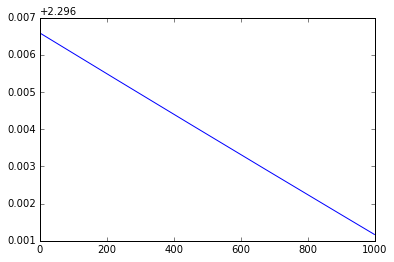

In [7]:
plt.plot(losses)
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [8]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [9]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [31]:
print('Training Accuracy: ', getAccuracy(Xtrain,ytrain))
print('Test Accuracy: ', getAccuracy(Xtest,ytest))

Training Accuracy:  [ 0.10333333  0.10366667  0.10233333 ...,  0.10333333  0.10333333  0.        ]
Test Accuracy:  [ 0.105   0.099   0.099  ...,  0.0945  0.0965  0.095 ]
